In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series,DataFrame

In [2]:
df=pd.read_csv('QL_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Hypothesis Generation with its Testing

In [7]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Chi-Square Test:

* Checking weather Gender and Status of Loan have any significant association among them :

In [8]:
A1=pd.crosstab(df['Property_Area'],df['Loan_Status'])
A1

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


* Null Hypothesis = There is no Relationship Between Gender and Loan Status
* Alternate Hypothesis = There is Relationship Between Gender and Loan Staus

In [9]:
obs_values = A1.values
obs_values

array([[ 69, 110],
       [ 54, 179],
       [ 69, 133]], dtype=int64)

In [10]:
import scipy.stats as stats

In [11]:
values = stats.chi2_contingency(obs_values)
values

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

In [12]:
exp_values = values[3]
exp_values

array([[ 55.97394137, 123.02605863],
       [ 72.85993485, 160.14006515],
       [ 63.16612378, 138.83387622]])

In [13]:
no_of_rows = len(A1.iloc[0:,0])
no_of_rows

3

In [14]:
no_of_columns = len(A1.iloc[0,0:])
no_of_columns

2

In [15]:
dof=(no_of_rows-1)*(no_of_columns-1)
dof

2

In [16]:
alpha=0.05

Degree of freedom:-
    
The zip() function returns a zip object, which is an iterator of tuples where the first iton in each passed itorator is paired together, and then the second item in each passed iterator are paired together etc.

In [17]:
chi_square=sum([(o-e)**2./e  for o,e in zip(obs_values,exp_values)])
chi_square

array([8.45211231, 3.84551082])

In [18]:
chi_square_statistics=chi_square[0]+chi_square[1]
chi_square_statistics

12.297623130485677

In [19]:
print('Chi Square Statistics =',chi_square_statistics)

Chi Square Statistics = 12.297623130485677


In [20]:
from scipy.stats import chi2

In [21]:
chi_critical_values=chi2.ppf(q=1-alpha,df=dof)
print('Chi_Critical_Values =',chi_critical_values)

Chi_Critical_Values = 5.991464547107979


In [22]:
# p value
p_value=1-chi2.cdf(x=chi_square_statistics,df=dof) #chi2.cdf [cumulative distribution function]
print('p_value =',p_value)
print('Significance level =',alpha)
print('Degree of Freedom =',dof)


p_value = 0.0021360187811645392
Significance level = 0.05
Degree of Freedom = 2


In [23]:
if chi_square_statistics>=chi_critical_values:
    print('Reject Null Hypothesis,There is a relationship between Property Area and Loan Status categorical variables.')
else:
    print('Retain Null Hypothesis,There is no relationship between Property Area and Loan Status categorical variables.')
if p_value<=alpha:
    print('Reject Null Hypothesis,There is a relationship between Property Area and Loan Status categorical variables.')
else:
    print('Retain Null Hypothesis,There is no relationship between Property Area and Loan Status categorical variables.')  #retain mean keeping
    

Reject Null Hypothesis,There is a relationship between Property Area and Loan Status categorical variables.
Reject Null Hypothesis,There is a relationship between Property Area and Loan Status categorical variables.


### T-Test : (Applicant Income with Loan Status)

* Null Hypothesis = There is no Relationship Between Loan Status and Applicant Income.
* Alternate Hypothesis = There is Relationship Between Loan Status and Applicant Income.

In [24]:
df.ApplicantIncome.groupby(df.Loan_Status).mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [25]:
yes1 = df[df['Loan_Status']=='Y']
no1 = df[df['Loan_Status']=='N']

In [26]:
from scipy.stats import ttest_ind

In [27]:
alpha1=0.05

In [28]:
t1=ttest_ind(yes1['ApplicantIncome'],no1['ApplicantIncome'],equal_var=False)
t1

Ttest_indResult(statistic=-0.10944913176213944, pvalue=0.9129148547301199)

In [29]:
p_value1 = t1[1]
print('P_value = ',p_value1)

P_value =  0.9129148547301199


In [30]:
if p_value1<=alpha1:
    print('Reject Null Hypothesis,There is a relationship between Loan Status and Applicant Income.')
else:
    print('Retain Null Hypothesis,There is no relationship between Loan Status and Applicant Income.')  #retain mean keeping
    

Retain Null Hypothesis,There is no relationship between Loan Status and Applicant Income.


### T-Test : (Credit History with Loan Status)

* Null Hypothesis = There is no Relationship Between Loan Status and Credit History.
* Alternate Hypothesis = There is Relationship Between Loan Status and Credit History.

In [31]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df.Credit_History.groupby(df.Loan_Status).mean()

Loan_Status
N    0.572917
Y    0.983412
Name: Credit_History, dtype: float64

In [32]:
yes2 = df[df['Loan_Status']=='Y']
no2 = df[df['Loan_Status']=='N']

In [33]:
from scipy.stats import ttest_ind

In [34]:
alpha2=0.05

In [35]:
t2=ttest_ind(yes2['Credit_History'],no2['Credit_History'],equal_var=False)
t2

Ttest_indResult(statistic=11.29933105962411, pvalue=2.8225294096174666e-23)

In [36]:
p_value2=t2[1]
print('P_value = ',p_value2)

P_value =  2.8225294096174666e-23


In [37]:
if p_value2<=alpha2:
    print('Reject Null Hypothesis,There is a relationship between Loan Status and Credit History.')
else:
    print('Retain Null Hypothesis,There is no relationship between Loan Status and Credit History.')  #retain mean keeping
    

Reject Null Hypothesis,There is a relationship between Loan Status and Credit History.


### T-Test : (Loan Amount with Loan Status)

* Null Hypothesis = There is no Relationship Between Loan Status and Loan Amount.
* Alternate Hypothesis = There is Relationship Between Loan Status and Loan Amount.

In [38]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount'].isnull().sum()

0

In [39]:
df['LoanAmount'].groupby(df['Loan_Status']).mean()

Loan_Status
N    150.945488
Y    144.349606
Name: LoanAmount, dtype: float64

In [40]:
yes3 = df[df['Loan_Status']=='Y']
no3 = df[df['Loan_Status']=='N']

In [41]:
from scipy.stats import ttest_ind

In [42]:
alpha3 = 0.05

In [43]:
t3 = ttest_ind(yes3['LoanAmount'],no3['LoanAmount'],equal_var=False)
t3

Ttest_indResult(statistic=-0.9055222720918126, pvalue=0.3657722699120539)

In [44]:
p_value3=t3[1]
print('P_value = ',p_value3)

P_value =  0.3657722699120539


In [45]:
if p_value3<=alpha3:
    print('Reject Null Hypothesis,There is a relationship between Loan Status and Loan Amount.')
else:
    print('Retain Null Hypothesis,But there is slightly some relationship between Loan Status and Loan Amount.')  #retain mean keeping
    

Retain Null Hypothesis,But there is slightly some relationship between Loan Status and Loan Amount.


### T-Test : (Loan Amount Term with Loan Status)

* Null Hypothesis = There is no Relationship Between Loan Status and Loan Amount Term.
* Alternate Hypothesis = There is Relationship Between Loan Status and Loan Amount Trem.

In [46]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Loan_Amount_Term'].groupby(df['Loan_Status']).mean()

Loan_Status
N    344.000000
Y    341.090047
Name: Loan_Amount_Term, dtype: float64

In [47]:
yes4 = df[df['Loan_Status']=='Y']
no4 = df[df['Loan_Status']=='N']

In [48]:
from scipy.stats import ttest_ind

In [49]:
alpha4 = 0.05

In [50]:
t4 = ttest_ind(yes4['Loan_Amount_Term'],no4['Loan_Amount_Term'],equal_var=False)
t4
# equal_var = False means it performs Welch's t-test, which does not assume equal population variance

Ttest_indResult(statistic=-0.5028799240967358, pvalue=0.6153713379359759)

In [51]:
p_value4 = t4[1]
print('P_value = ',p_value4)

P_value =  0.6153713379359759


In [52]:
if p_value4<=alpha4:
    print('Reject Null Hypothesis,There is a relationship between Loan Status and Loan Term.')
else:
    print('Retain Null Hypothesis,There is no relationship between Loan Status and Loan Term.')  #retain mean keeping
    

Retain Null Hypothesis,There is no relationship between Loan Status and Loan Term.


* Conclusion:-
 Out of these four Numerical Attribute (ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History)
 only Credit History found singnificant relation with the Loan Approval by using T-test.

### Creation of New Attribute :

In [53]:
# total income
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Exploratory Data Analysis : (Visualization)

### Univariate Analysis :

* Count of Gender.

In [54]:
x = df['Gender'].value_counts()
x

Male      489
Female    112
Name: Gender, dtype: int64

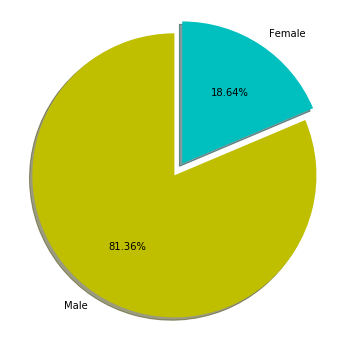

In [55]:
plt.figure(figsize=(6,6))
plt.pie(x,labels=x.index,autopct='%1.2f%%',shadow=True,colors='yc',startangle=90,explode=(0,0.1))
plt.axis('equal')
plt.show()

* Count of married and unmarried Peoples.


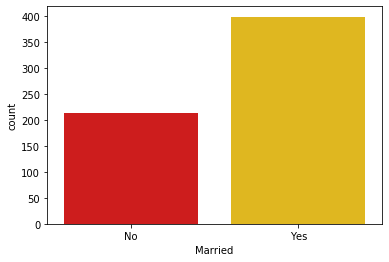

In [56]:
sns.countplot(df['Married'],palette='hot')
plt.show()

* Count for Number of 'Dependent persons on Applicant'.

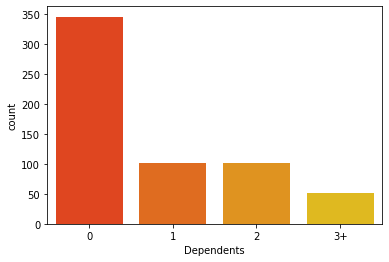

In [57]:
sns.countplot(df['Dependents'],palette='autumn')
plt.show()

* Count of Graduates and Non-Graduates.

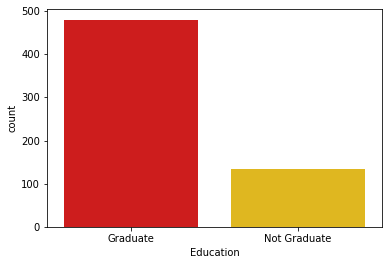

In [58]:
sns.countplot(df['Education'],palette='hot')
plt.show()

* Count of peoples for either they're self-employed or not.

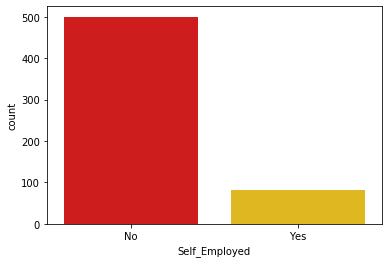

In [59]:
sns.countplot(df['Self_Employed'],palette='hot')
plt.show()

* Sum up of different Regions where property belogs.

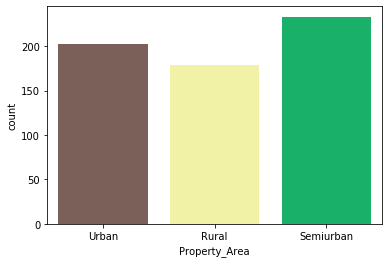

In [60]:
sns.countplot(df['Property_Area'],palette='terrain_r')  
plt.show()                       #we can use palette as summer,winter,autumn,spring,rainbow

* Count of loan approval as in Yes or No.

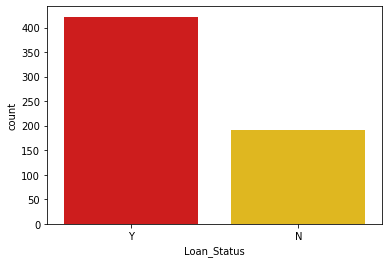

In [61]:
sns.countplot(df['Loan_Status'],palette='hot')
plt.show()

### Bivariate Analysis :

* Hypothesis for Applicant Income: Applicant with high Income should have more chances of loan approval.

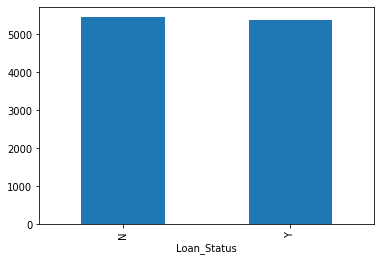

In [62]:
df['ApplicantIncome'].groupby(df['Loan_Status']).mean().plot.bar()

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


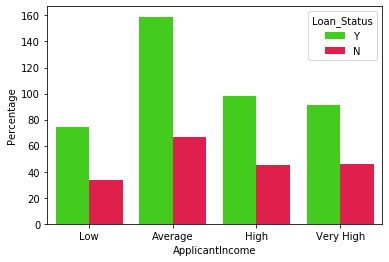

In [63]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
sns.countplot(df['Income_bin'],hue=df['Loan_Status'],palette='prism')
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage') 
pd.crosstab(df['Income_bin'],df['Loan_Status'])

 It can be inferred that Applicant income does not affect the chances of loan approval which   contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

* Hypothesis for Co Applicant Income: Co Applicant with high Income should have more chances of loan approval.

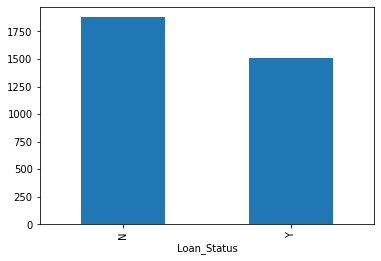

In [64]:
df['CoapplicantIncome'].groupby(df['Loan_Status']).mean().plot.bar()

Loan_Status,N,Y
Income_bin,,
Low,3,19
Average,61,161
High,15,32


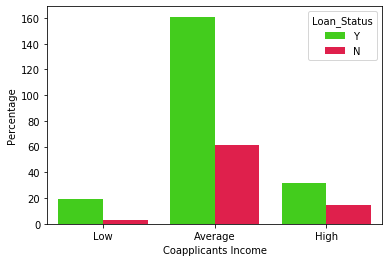

In [65]:
bins = [0,1000,3000,4200]
group = ['Low','Average','High']
df['Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
sns.countplot(df['Income_bin'],hue=df['Loan_Status'],palette='prism')
plt.xlabel('Coapplicants Income')
plt.ylabel('Percentage')
pd.crosstab(df['Income_bin'],df['Loan_Status'])

 It can be inferred that Co Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the Co Applicant income is high the chances of loan approval will also be high.

* So here we try to prove our Hypothesis by adding Applicant and Co Applicant Income as Total Income

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


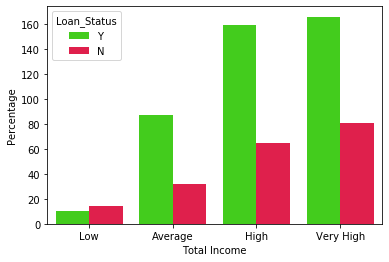

In [66]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
sns.countplot(df['Total_Income_bin'],hue=df['Loan_Status'],palette='prism')
plt.xlabel('Total Income')
plt.ylabel('Percentage')

pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])

 So here now it can be clearly inferred that Addition of both Income as Total Income has influences the chances of loan approval which proved our hypothesis in which we assumed that if the Total Income is high,the chances of loan approval will also be high.

* Hypothesis for Loan Amount : If the Loan Amount is less the chances of loan approval is high.

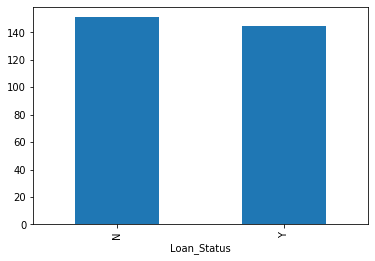

In [67]:
p=df['LoanAmount'].groupby(df['Loan_Status']).mean().plot.bar()
p

In [68]:
df['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

Loan_Status,N,Y
LoanAmount_bin,,
Low,161,373
Average,27,39
High,4,10


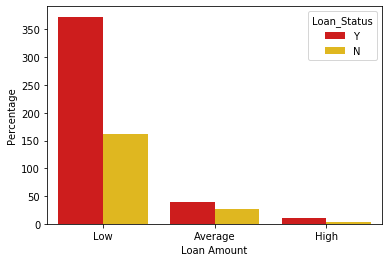

In [69]:
bins = [0,200,400,700]
group = ['Low','Average','High']
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(df['LoanAmount'],df['Loan_Status'])
sns.countplot(df['LoanAmount_bin'],hue=df['Loan_Status'],palette='hot')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])

Here we can inferred that the less loan amount has higher chances of loan approval,which proves our hypothesis true.

* Hypothesis for Credit History : Applicants having credit history as 1 have higher chances of loan approval.

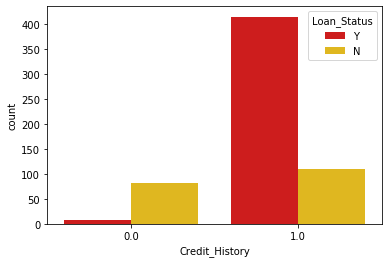

In [70]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'],palette='hot')
plt.show()

It can be inferred that Credit History as 1 have higher loan approval rate which proved our hypothesis in which we assumed that credit history as 1 which means applicant who have paid there previous debts has higher chances of loan approval.

* Hypothesis for Loan Amount Term : Loan for less time period should have higher chances of approval.

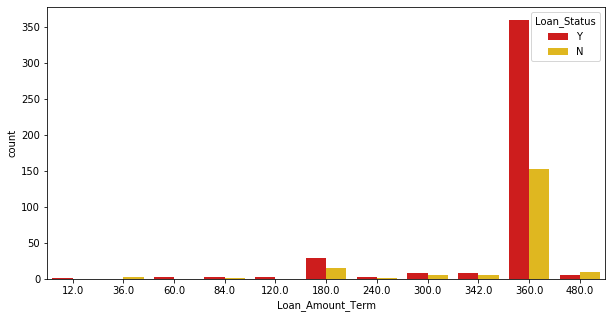

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(df['Loan_Amount_Term'],hue=df['Loan_Status'],palette='hot')
plt.show()

Loan_Status,N,Y,All
LoanTerm_bin,,,
1-4,3,9,12
4-8,16,32,48
8-12,164,375,539
12-16,9,6,15
All,192,422,614


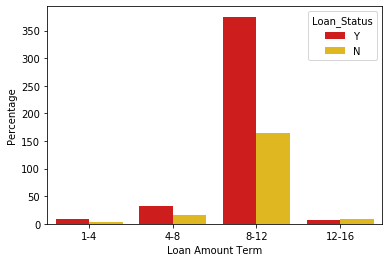

In [72]:
bins = [0,120,240,360,480]
group = ['1-4','4-8','8-12','12-16']
df['LoanTerm_bin']=pd.cut(df['Loan_Amount_Term'],bins,labels=group)
LoanTerm_bin = pd.crosstab(df['Loan_Amount_Term'],df['Loan_Status'])
sns.countplot(df['LoanTerm_bin'],hue=df['Loan_Status'],palette='hot')
plt.xlabel('Loan Amount Term')
plt.ylabel('Percentage')
pd.crosstab(df['LoanTerm_bin'],df['Loan_Status'],margins=True)

 It can be inferred that Loan Time Period does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the Loan Amount Term is less the chances of loan approval will also be high.

* Approval of Loan According to its Property Region :


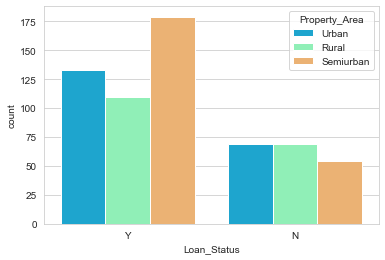

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Property_Area',data=df,palette='rainbow')
plt.show()

* Count up of Loan Status According to Credit History of Applicant

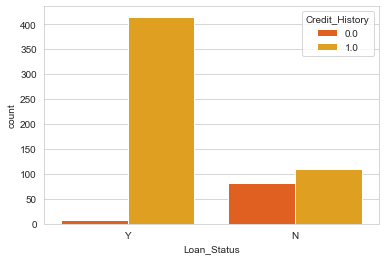

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=df,palette='autumn')
plt.show()

* Customers loan approval according to Self Employment :

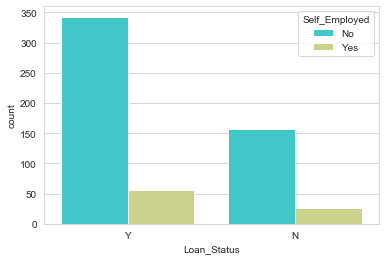

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df,palette='rainbow')
plt.show()

* Average salary of applicant according to their Education :

In [76]:
y=df['ApplicantIncome'].groupby(df['Education']).mean()
y

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

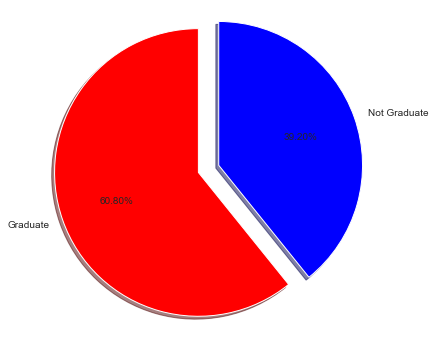

In [77]:
plt.figure(figsize=(6,6))
plt.pie(y,labels=y.index,autopct='%1.2f%%',shadow=True,colors='rb',startangle=90,explode=(0,0.15))
plt.axis('equal')
plt.show()

* Average salary of Co-Applicant according to their Education :

In [78]:
z=df['CoapplicantIncome'].groupby(df['Education']).mean()
z

Education
Graduate        1717.474833
Not Graduate    1276.544776
Name: CoapplicantIncome, dtype: float64

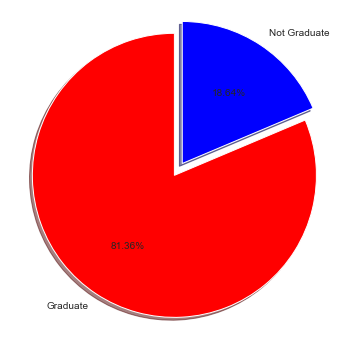

In [79]:
plt.figure(figsize=(6,6))
plt.pie(x,labels=z.index,autopct='%1.2f%%',shadow=True,colors='rb',startangle=90,explode=(0,0.1))
plt.axis('equal')
plt.show()

* Average of Applicants salary according to their Property region :

In [80]:
p=df['ApplicantIncome'].groupby(df['Property_Area']).mean()
p

Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

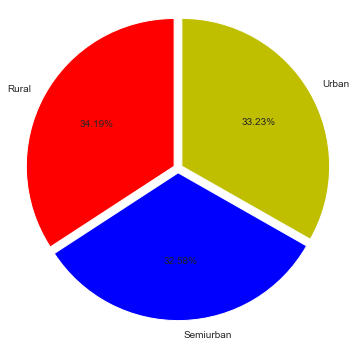

In [81]:
plt.figure(figsize=(6,6))
plt.pie(p,labels=p.index,autopct='%1.2f%%',colors='rby',startangle=90,explode=(0.03,0.03,0.03))
plt.axis('equal')
plt.show()

In [82]:
q = df.corr()
q

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431,0.620102
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.069830
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.012563
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.012563,1.000000


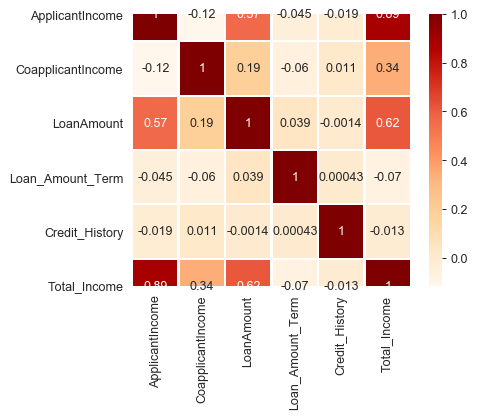

In [83]:
plt.figure(figsize=(5,4),dpi=90)
sns.heatmap(q,annot=True,cmap='OrRd',linewidths=1)
plt.show()

In [84]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_bin,Total_Income_bin,LoanAmount_bin,LoanTerm_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,NaN,High,Low,8-12
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,Average,Very High,Low,8-12
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,NaN,Average,Low,8-12
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,Average,High,Low,8-12
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,NaN,High,Low,8-12


### Filling Missing Values :

In [85]:
df['LoanAmount'].isnull().sum()

0

In [86]:
df['Loan_Amount_Term'].isnull().sum()

0

In [87]:
df['Credit_History'].isnull().sum()

0

In [88]:
# filling the missing values for numerical terms with their Mean
               # already filled
#df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())  
#df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [89]:
# filling the missing values for categorical terms with their Mode
# Here df['Gender'].mode() Gives us result in the form of DataFrame thatswhy we use its index[0]
# after knowing its index by running it in seperate cell

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
                      #already filled
#df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

* Numerical Attribute Visualization

### Log Transformation (Outlier Treatment):

* Distplot of Applicants Income

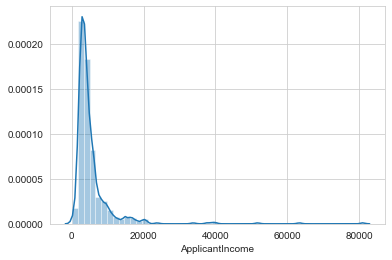

In [90]:
sns.distplot(df['ApplicantIncome'])
plt.show()

* Log Transformation of Applicant Income for Normalization.

In [91]:
# applying Log transformation to the attibute to normalize the distribution in order to
# train the model better.
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])

In [92]:
# apply log transformation,min max normalization or standerdization to normalize the distribution

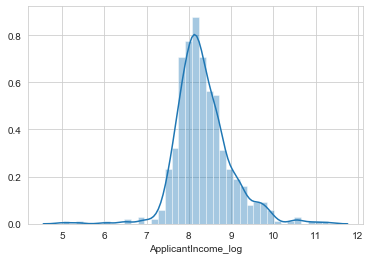

In [93]:
sns.distplot(df['ApplicantIncome_log'])
plt.show()


* Distplot for Co Applicant Income.

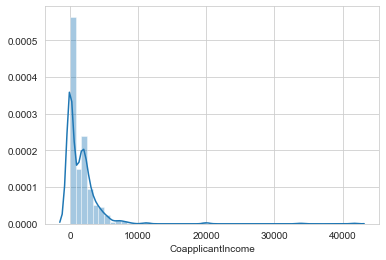

In [94]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [95]:
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'])

C:\Users\kg\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


* Distplot of Loan Amount.

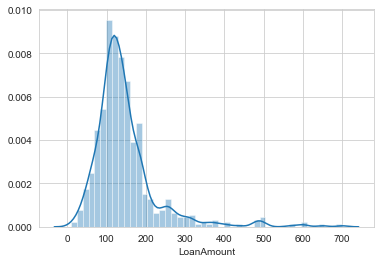

In [96]:
sns.distplot(df['LoanAmount'])
plt.show()

* Log Transformation of Loan Amount for Normalization.

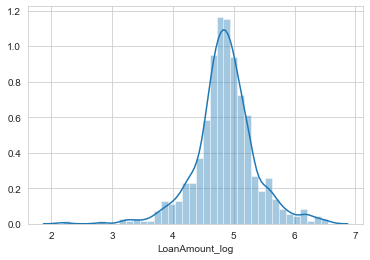

In [97]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])
plt.show()

* Distplot of Loan Amount Term.

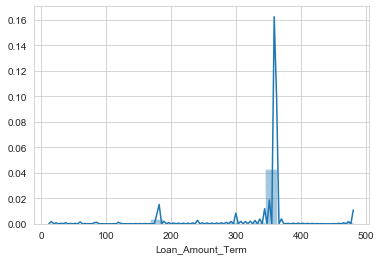

In [98]:
sns.distplot(df['Loan_Amount_Term'])
plt.show()

* Log Transformation of Loan Amount Term for Normalization.

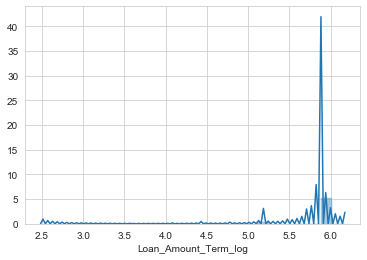

In [99]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'])
plt.show()

* Distplot of Total Income.

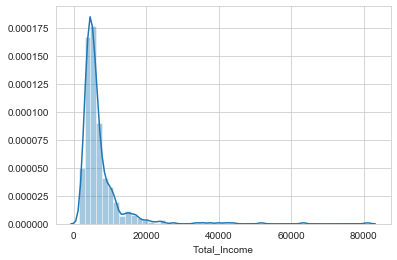

In [100]:
sns.distplot(df['Total_Income'])
plt.show()

* Log Transformation of Total Income for Normalization.

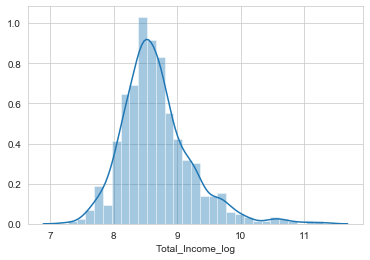

In [101]:
df['Total_Income_log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log'])
plt.show()

In [102]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_Income,Income_bin,Total_Income_bin,LoanAmount_bin,LoanTerm_bin,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,5849.0,NaN,High,Low,8-12,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,6091.0,Average,Very High,Low,8-12,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,3000.0,NaN,Average,Low,8-12,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,4941.0,Average,High,Low,8-12,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,6000.0,NaN,High,Low,8-12,8.699515,-inf,4.948760,5.886104,8.699515


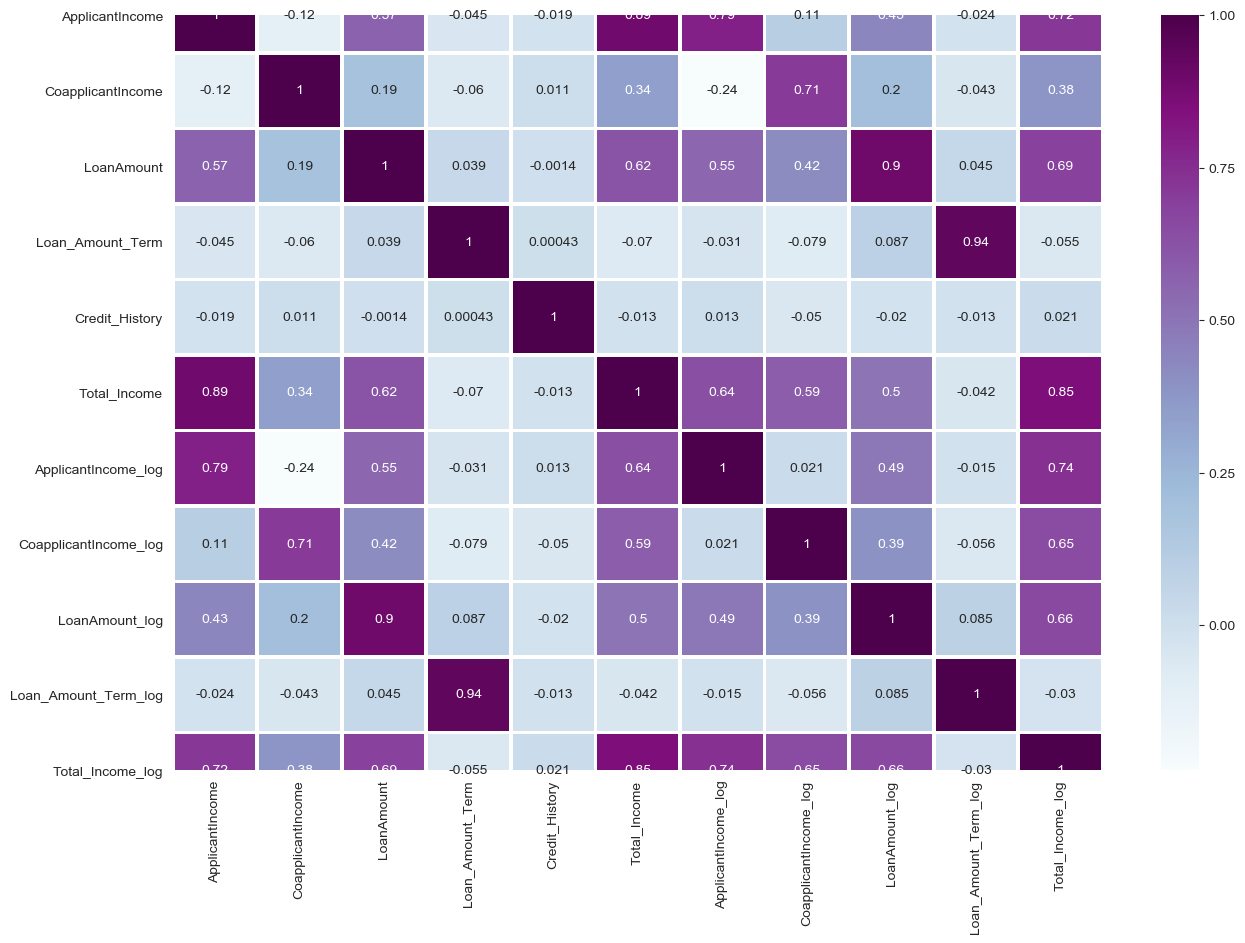

In [103]:
corr = df.corr()
plt.figure(figsize=(15,10),dpi=100,facecolor='w',edgecolor='w')
sns.heatmap(corr,annot=True,cmap='BuPu',linewidths=2,)
plt.show()               #we can use cmap as BuPu,Blues,Blues_r

In [104]:
# dropping unnecessary columns
drop_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','ApplicantIncome_log',
            'CoapplicantIncome_log','Loan_ID','Income_bin','Total_Income_bin','LoanAmount_bin','LoanTerm_bin']
df = df.drop(columns=drop_col,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,5.886104,8.699515


### Label Encoding :

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encode_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in encode_col:
    df[col] = le.fit_transform(df[col])

In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,4.948760,5.886104,8.699515


In [108]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Train-Test Split :

In [109]:
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
92,1,1,2,1,0,1.0,2,4.394449,5.886104,8.535622
304,1,0,0,0,0,1.0,0,4.941642,5.886104,8.779557
68,1,1,3,1,1,1.0,2,4.828314,4.094345,8.867850
15,1,0,0,0,0,1.0,2,4.828314,5.886104,8.507143
211,1,1,3,0,0,0.0,1,4.852030,5.886104,8.451053
...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.0,1,4.574711,5.886104,8.229511
106,1,1,2,0,0,1.0,2,5.416100,5.886104,9.436918
270,0,0,0,0,0,1.0,2,3.401197,5.886104,8.082402
435,0,1,0,0,0,1.0,1,4.986426,5.480639,9.215029


## Model Training :

In [112]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is',model.score(x_test,y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5,train=4 ,test=1
    score = cross_val_score(model, X, y, cv = 5)
    print('Cross Validation Score is',np.mean(score)*100)

#### With Logestic Regression :

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is 77.27272727272727
Cross Validation Score is 80.9462881514061


#### With Decision Tree Classifier :

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X ,y)

Accuracy is 72.72727272727273
Cross Validation Score is 69.05637744902039


#### With Random Forest Classifier :

In [115]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is 77.92207792207793
Cross Validation Score is 78.3406637345062


#### With Extra Trees Classifier :

In [116]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 74.67532467532467
Cross Validation Score is 75.89630814340931


#### With KNeighbors Classifier :

In [117]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,X,y)

Accuracy is 72.72727272727273
Cross Validation Score is 74.91803278688525


### Hyperparameter Tuning for Random Forest:

In [118]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parameters={'max_depth':[3,None],'min_samples_split':[2,3,4],'criterion':['gini','entropy']}

In [119]:
RF = RandomForestClassifier()
RS_CV = RandomizedSearchCV(RF,parameters,cv = 5)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
RS_CV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [121]:
y_pred = RS_CV.predict(x_test)

In [122]:
RS_CV.best_params_

{'min_samples_split': 3, 'max_depth': 3, 'criterion': 'entropy'}

In [123]:
from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test,y_pred)
score*100

77.27272727272727

#### Score After applying Random Search CV with Hyper Parameter Tuning:

In [124]:
RS_CV.best_score_*100

82.3913043478261

### Confusion Matrix :

In [125]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

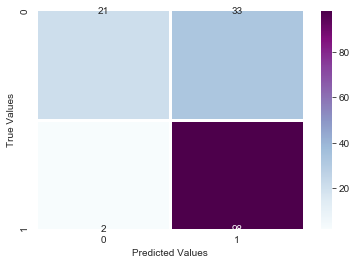

In [127]:
sns.heatmap(cm,annot = True,linewidths=2,cmap = 'BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Hyper Parameter Tuning for Logistic Regression:

In [128]:
LR_PARAMETERS={'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'C':[100, 10, 1.0, 0.1, 0.01]}

In [129]:
LR=LogisticRegression()
LR_cv=RandomizedSearchCV(LR,LR_PARAMETERS,cv=5)

In [130]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [131]:
LR_cv.fit(x_train,y_train)

C:\Users\kg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\kg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\kg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\kg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs

In [132]:
LR_Y_predict=LR_cv.predict(x_test)

In [133]:
LR_cv.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'C': 10}

In [134]:
LR_Score= accuracy_score(LR_Y_predict,y_test)
LR_Score*100

77.27272727272727

In [135]:
LR_cv.best_score_*100

82.17391304347827

### Confusion Matrix:

In [136]:
confusion_matrix(y_test,LR_Y_predict)

array([[21, 33],
       [ 2, 98]], dtype=int64)

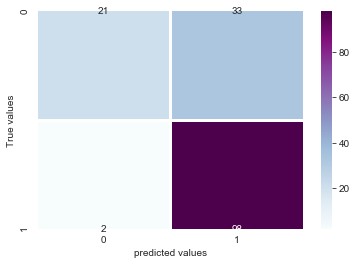

In [137]:
sns.heatmap(confusion_matrix(y_test,LR_Y_predict),annot=True,linewidths=2,cmap = 'BuPu')
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.show()

In [141]:
comparision = pd.DataFrame({'Algorithm':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Extra Tree Classifier','KNN','Random Forest HyperTuned','Logistic Regression HyperTuned'],
                           'Accuracy':[77.27,72.72,75.97,74.67,72.72,77.27,77.27],'Cross Validation Score':[80.94,69.38,77.85,74.59,74.91,82.39,82.17]})

In [142]:
comparision

,Algorithm,Accuracy,Cross Validation Score
0,Logistic Regression,77.27,80.94
1,Decision Tree Classifier,72.72,69.38
2,Random Forest Classifier,75.97,77.85
3,Extra Tree Classifier,74.67,74.59
4,KNN,72.72,74.91
5,Random Forest HyperTuned,77.27,82.39
6,Logistic Regression HyperTuned,77.27,82.17


In [143]:
comparision.sort_values(by='Cross Validation Score',ascending=False)

,Algorithm,Accuracy,Cross Validation Score
5,Random Forest HyperTuned,77.27,82.39
6,Logistic Regression HyperTuned,77.27,82.17
0,Logistic Regression,77.27,80.94
2,Random Forest Classifier,75.97,77.85
4,KNN,72.72,74.91
3,Extra Tree Classifier,74.67,74.59
1,Decision Tree Classifier,72.72,69.38
